## Importing the necessary libraries

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## Step 1 : Gathering the data

In [2]:
# load the CSV file into pandas DataFrame
dataSet = pd.read_csv('./bengaluru_house_prices.csv')
dataSet.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Step 2 : Exploring and understanding the data

In [3]:
# Finding the # of rows and columns
dataSet.shape

(13320, 9)

In [4]:
# Find out the columns present in the dataset

dataSet.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
# Find out the unique values under 'area_type'

dataSet.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
# Find out how many unique locations we have in the dataset

dataSet.location.nunique()

1305

In [7]:
# Geting the total # of plots under each category of 'area_type'

dataSet.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
# Drop the columns which are not useful for the prediction

dataSet.drop(['area_type','availability','society','balcony'], axis='columns', inplace=True)

dataSet.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Step 4 : Pre-processing the data


### Handling the NULL values

In [9]:
# Get the total # of null values in each column 
dataSet.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
# We are dropping the rows which have NULL values 
dataSet.dropna(inplace=True)

print(f'The number of (rows, columns) after dropping the rows which had NULL values : {dataSet.shape}')

dataSet.isnull().sum()

The number of (rows, columns) after dropping the rows which had NULL values : (13246, 5)


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
dataSet.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Handling the inconsistent data - part 1
#### (Also comes under the step of Feature Engineering)

In [12]:
# Resolve the confusion in the data under 'size' column
# Eg., 4 Bedroom = 4 BHK
# So we'll add a column named 'BHK' which contains only the number of bedrroms 

# Here we take the each value from size column and 'apply' the function :
# splitting of the each value using (' ') and taking only the first part of it
# and we convert that into integer
dataSet['BHK'] = dataSet['size'].apply(lambda x: int(x.split(' ')[0]))

dataSet.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


### Handling the inconsistent data - part 2

In [13]:
# Now, lets check 'total_sqft'

dataSet.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# In the above output, as you can see 
# The 'total_sqft' is entered as a range
# So lets handle those values. 

In [15]:
# Lets define a function which :
# Detect whether the value is of float data type or not

def isFloat(num):
    
    # Try block: will try to convert the value to a float number
    try :
        float(num)
        
    # If it encounters range values, which cannot be converted, EXCEPTION will be raised
    # We catch he EXCEPTION and return FALSE
    except :
        return False
    
    ## If the value gets converted to a floating number
    # then we return TRUE
    return True

In [16]:
# We first try to get the values which are floating under 'total_sqft'

# dataSet[dataSet['total_sqft'].apply(isFloat)].head()

# Now lets look into the data which has 'total_sqft' in range values
# We use '~' to the above line to get the results which are not in that

dataSet[~dataSet['total_sqft'].apply(isFloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
# If you look at the above output, the values under 'total_sqft' is not only in range values, 
# but also the pattern and units differs.
# Eg., 34.46Sq. Meter, 4125Perch, 3090 - 5002
# Hence we need to bring the uniformity among the values in the 'total_sqft' column 
# In this project, we gonna handle the range values by replacing it with the AVERAGE value of the range
# and other values of different units will be ignored as of now.

In [18]:
# Lets define a function which :
# converts the range values into the AVERAGE value of it.

def converRangeToAvg(value):
    
    # First, lets split the value uaing ('-')
    tokens = value.split('-')
    
    # To check whether the value is a range or not
    if len(tokens) == 2:
        
        # If it is range value, then return the AVERAGE of it
        return ((float(tokens[0])+float(tokens[1]))/2)
    
    # Again try to convert the value to float
    try :
        return float(value)
    except : 
        return None

In [19]:
# Lets check whether the above function is working properly or not
# print(f"Normal value 2020 : {converRangeToAvg('2020')}")
# print(f"Range value (2000 - 2040) : {converRangeToAvg('2000 - 2040')}")

In [20]:
# Now we'll apply the above converting function to the entire 'total_sqft' column
dataSetCopy = dataSet.copy()

dataSetCopy['total_sqft'] = dataSetCopy['total_sqft'].apply(converRangeToAvg)

# Take a look at unique values agin to ensure that there are no range values in the dataset
# dataSetCopy.total_sqft.unique()

In [21]:
# in the output above, the index : 672 has range value (3090 - 5002).
# Lets check whether its resolved or not
dataSetCopy.loc[672]

location      Bettahalsoor
size             4 Bedroom
total_sqft          4046.0
bath                   4.0
price                445.0
BHK                      4
Name: 672, dtype: object

## Step 5 : Feature Engineering

### Adding a new column 'price_per_sqft', which will later help in outlier detection.

In [22]:
# Price_per_sqft = (Price*100000)/total_sqft
# Because the price in the dataset is in Lakhs, so in order to scale it noram units, we multiply

dataSetCopy['price_per_sqft'] = (dataSetCopy.price * 100000) / dataSetCopy.total_sqft

In [23]:
dataSetCopy.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
dataSetCopy.location.nunique()

1304

In [25]:
# Here the 'location' column is a categorical column
# which should be handled using one-hot encoder or dummy_variables.
# Since the unique categoies in the coulmn is so large
# We cannot use the one-hot encoder or dummy_variables.
# Hence we use the 'Dimesionality Reduction' technique to handle the issue 

### Dimensionality Reduction 

In [26]:
# For dimensionality reduction,
# We use 'other' category techinque.
# Means, the total count of each unique location having < 1 plots
# then we group them all under 'OTHER' category.

In [27]:
# First lets strip the extra spaces before and after the location values (if there)
dataSetCopy.location = dataSetCopy.location.apply(lambda x: x.strip())

# Now lets count the number plots we have for each uniuqe location
location_stats = dataSetCopy.location.value_counts(ascending=False)
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [28]:
# number of locations having plots > 15
len(location_stats[location_stats > 15])

181

In [29]:
# number of locations having plots > 10
len(location_stats[location_stats > 10])

241

In [30]:
# number of locations having plots < 10
len(location_stats[location_stats <= 10])

1052

In [31]:
# store the locations with count <= 10
location_counts_lessthan_10 = location_stats[location_stats <= 10]
location_counts_lessthan_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [32]:
# Now lets change the location names to other for the above list
dataSetCopy.location = dataSetCopy.location.apply(lambda x: 'other' if x in location_counts_lessthan_10 else x)

# now checking the # of unique locatiions including the 'other' category
dataSetCopy.location.nunique()

242

In [33]:
dataSetCopy.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outliers removal

### Method 1 : Using Business Logic
As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our **minimum thresold per bhk to be 300 sqft**

In [34]:
#Lets check how many records which are out of the above assumption
dataSetCopy[dataSetCopy.total_sqft/dataSetCopy.BHK < 300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [35]:
# Lets reomove the above sets of records considering them as OUTLIERS
dataSetCopy1 = dataSetCopy[~(dataSetCopy.total_sqft/dataSetCopy.BHK < 300)]

# Lets get the # of rows before and after droppoing of the records
# For before dropping, we consider 'dataSetCopy'
# For after dropping, we consider 'dataSetCopy1'
# (rows_before, _) = dataSetCopy.shape
# (rows_after, _) = dataSetCopy1.shape

# Display the rows before and after dropping
print(f'# of rows BEFORE dropping : {dataSetCopy.shape[0]}')
print(f'# of rows AFTER dropping : {dataSetCopy1.shape[0]}')
print(f'# of rows DROPPED : {dataSetCopy.shape[0] - dataSetCopy1.shape[0]}')

# of rows BEFORE dropping : 13246
# of rows AFTER dropping : 12502
# of rows DROPPED : 744


### Method 2 : Using Standard Deviation and Mean

In [36]:
# Lets look at the statistics of 'price_per_sqft'
dataSetCopy1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
# If you look at the values,
# we can clearly say that there are outliers in the 'price_per_sqft' data

# Method of removing outliesr : 
# Finding the mean and std. deviation for each unique location, and
# dropping the values which are beyond 1 std. deviation

In [38]:
# Defining a function which will :
# Find the Mean and Std. dev for each location
# And removes the records which are 1 Std. dev beyond

def remove_pps_outliers(df) : 
    
    # For storing the records without outliers
    df_out = pd.DataFrame()
    
    # dataframe is grouped by location and in loop for each unique location
    for loc, records in df.groupby('location') :
        
        # Finidng MEAN(m), and Std. dev(st) of price_per_sqft for each location
        m = np.mean(records.price_per_sqft)
        st = np.std(records.price_per_sqft)
        
        # Keeping the records which are within 1 std. deviation
        safe_records = records[((records.price_per_sqft) > (m-st)) & ((records.price_per_sqft) <= (m+st))]
        
        #Adding the above records to the df_out
        df_out = pd.concat([df_out, safe_records], ignore_index=True)
        
    return df_out

In [39]:
# lets call the function to actually remove the outliers from 'price_per_sqft'

dataSetCopy2 = remove_pps_outliers(dataSetCopy1)

# Lets get the # of rows before and after droppoing of the records
# For before dropping, we consider 'dataSetCopy1'
# For after dropping, we consider 'dataSetCopy2'
# (rows_before, _) = dataSetCopy1.shape
# (rows_after, _) = dataSetCopy2.shape

# Display the rows before and after dropping
print(f'# of rows BEFORE dropping : {dataSetCopy1.shape[0]}')
print(f'# of rows AFTER dropping : {dataSetCopy2.shape[0]}')
print(f'# of rows DROPPED : {dataSetCopy1.shape[0] - dataSetCopy2.shape[0]}')

# of rows BEFORE dropping : 12502
# of rows AFTER dropping : 10241
# of rows DROPPED : 2261


In [40]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

# Defining a function which plots a scatter plot for the passed data

def plotScatterChart(df,location) :
    
    #Separating the 2BHK and 3BHK plots 
    BHK_2 = df[(df.location == location) & (df.BHK == 2)]
    BHK_3 = df[(df.location == location) & (df.BHK == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    # Plotting the scatter plot for 2BHK and 3BHK records
    plt.scatter(BHK_2.total_sqft, BHK_2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(BHK_3.total_sqft, BHK_3.price, color='green', label='3 BHK', s=50)
    
    # Providing the X-label, Y-label and Title for the plot
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in LAKHS)')
    plt.title(location)
    
    # To display the ref box on top of the plot to differentiate the records
    plt.legend()
    

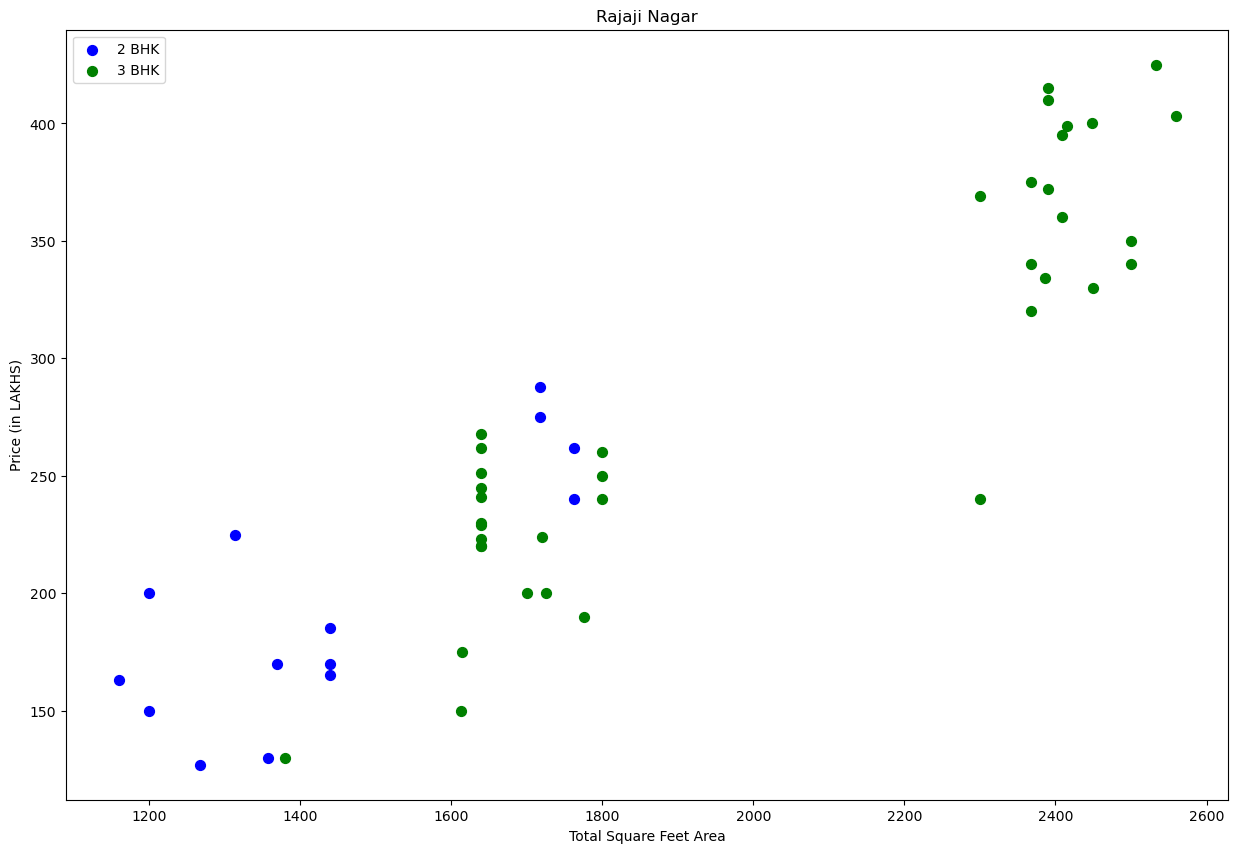

In [41]:
# Plotting for the location : Rajaji Nagar
plotScatterChart(dataSetCopy2, 'Rajaji Nagar')

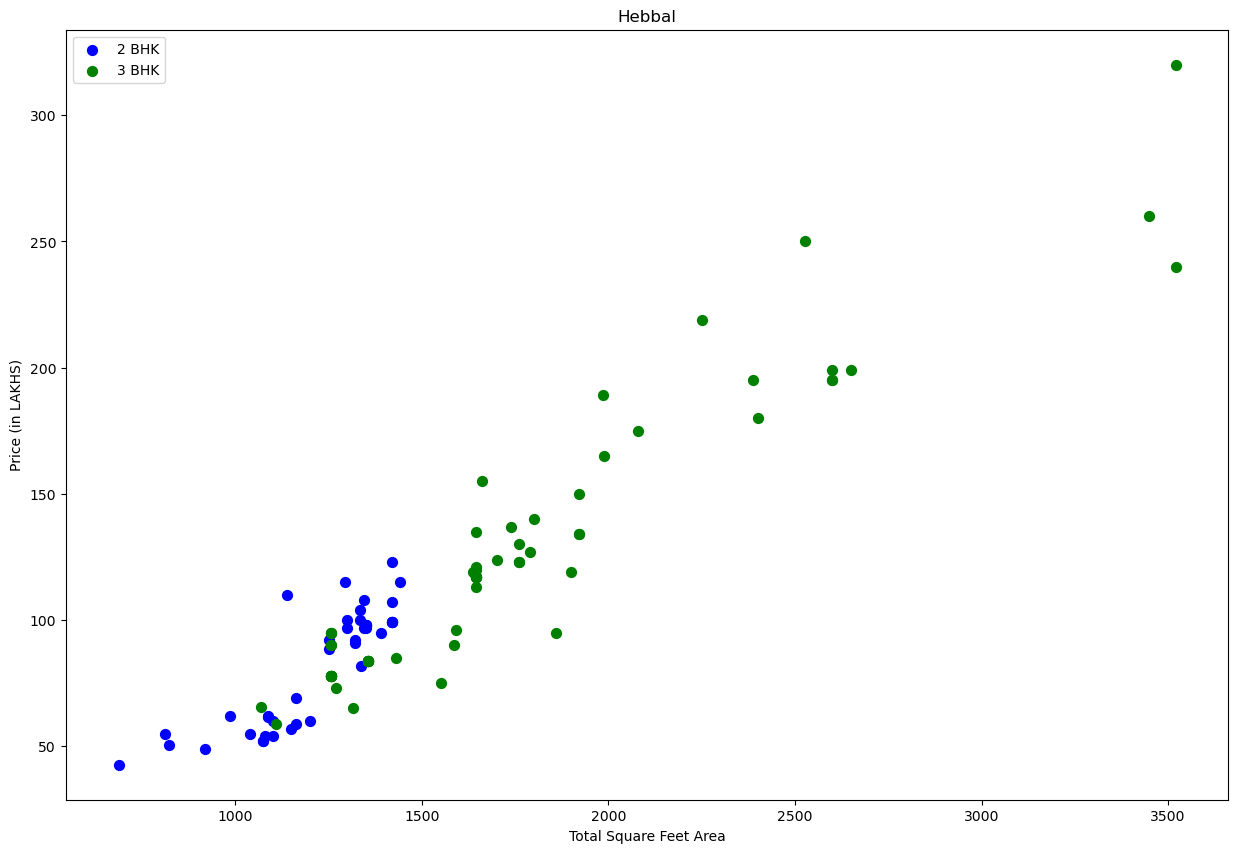

In [42]:
# Plotting for the location : Hebbal
plotScatterChart(dataSetCopy2, 'Hebbal')

In [43]:
# We can see that the price for some 2BHK and 3 BHK is not actually acceptable 
# For same sqft_area, 2BHK has higher price than 3BHK
# So we are removing those kinds of data, just for the sake of meaningfulness

In [44]:
# We should also remove properties where 
# for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).
# What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

# {
#    'location_1' : {
#        'mean': 4000,
#        'std: 2000,
#        'count': 34
#    },
#    'location_2' : {
#        'mean': 4300,
#        'std: 2300,
#        'count': 22
#    },    
# }
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [45]:
# Defining a function to do the above task

def remove_BHK_outliers(df) :
    
    # ndarray to store the index names which could be dropped
    exclude_indices = np.array([])
    
    # grouping the locations and parsing through each one of it
    for location, records in df.groupby('location') : 
        
        # a dict to store the necessary statistics for each BHK under each location
        BHK_stats = {}
        
        # groping the BHK under each location and parsing thorugh each one of it
        for bhk, bhkRecords in records.groupby('BHK') : 
            
            # Dic : Key -> BHK, Value -> mean, std. dev, count 
            BHK_stats[bhk] = {
                'mean' : np.mean(bhkRecords.price_per_sqft),
                'std' : np.std(bhkRecords.price_per_sqft),
                'count' : bhkRecords.shape[0]
            }
            
        # running the above loop again to find the outliers
        # based on the mean value of each BHK and the actual value of price_per_sqft
        for bhk, bhkRecords in records.groupby('BHK') : 
            
            # Taking the previous BHK. Eg, for BHK=2, comapring BHK=1
            stats = bhkRecords.get(bhk-1)
            
            # if there is stats for the BHK calculated above and their count > 5
            if stats and stats['count'] > 5 :
                
                # comparing the actual price_per_sqft to the mean of the next BHK stats
                exclude_indices = np.append(exclude_indices, bhkRecords[(bhkRecords.price_per_sqft < stats['mean'])].index.values)
                
    return df.drop(exclude_indices, axis='index')

In [46]:
# lets call the function to actually remove the outliers based on the above explaination

dataSetCopy3 = remove_pps_outliers(dataSetCopy2)

# Lets get the # of rows before and after droppoing of the records
# For before dropping, we consider 'dataSetCopy2'
# For after dropping, we consider 'dataSetCopy3'
# (rows_before, _) = dataSetCopy2.shape
# (rows_after, _) = dataSetCopy3.shape

# Display the rows before and after dropping
print(f'# of rows BEFORE dropping : {dataSetCopy2.shape[0]}')
print(f'# of rows AFTER dropping : {dataSetCopy3.shape[0]}')
print(f'# of rows DROPPED : {dataSetCopy2.shape[0] - dataSetCopy3.shape[0]}')


# of rows BEFORE dropping : 10241
# of rows AFTER dropping : 6965
# of rows DROPPED : 3276


In [47]:
dataSetCopy3.price_per_sqft.describe()

count     6965.000000
mean      5413.256940
std       1796.907720
min       2439.024390
25%       4333.333333
50%       5106.382979
75%       6071.428571
max      24166.666667
Name: price_per_sqft, dtype: float64

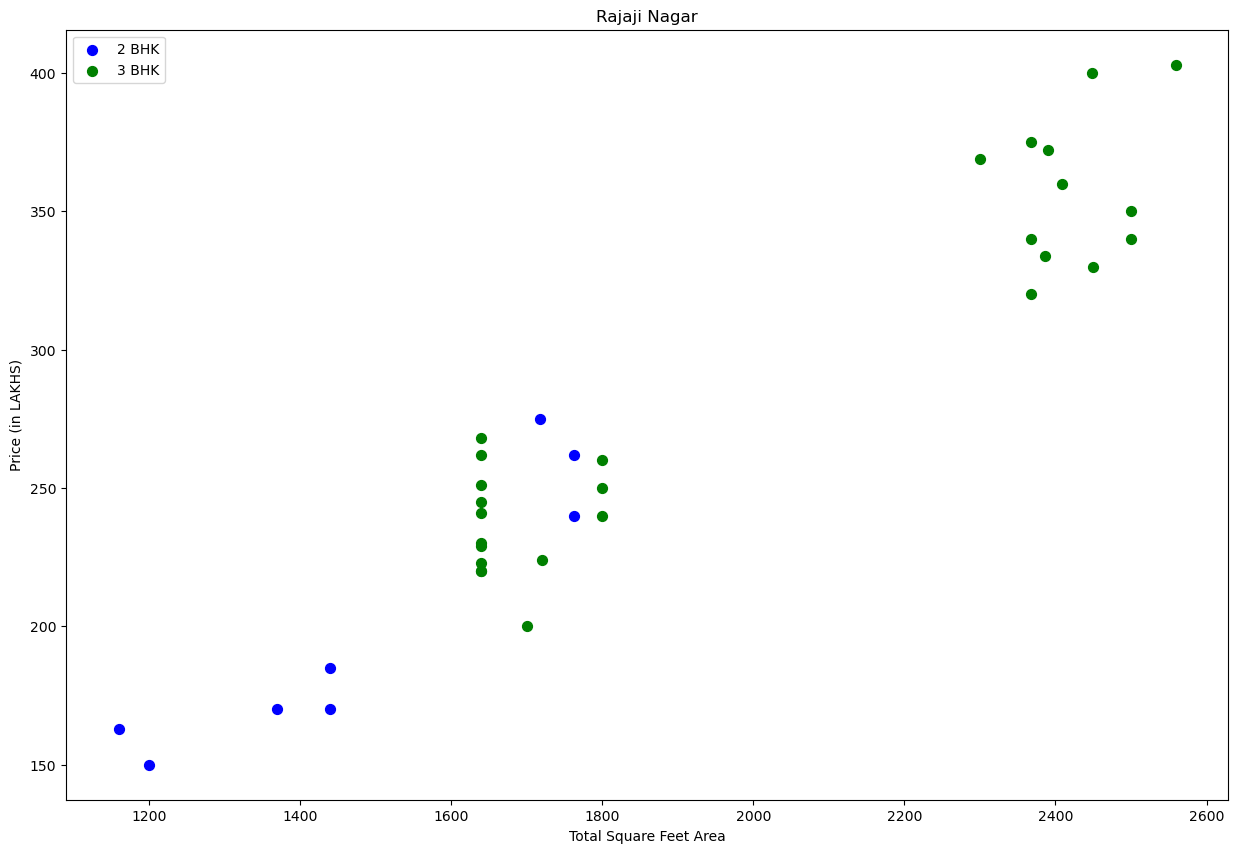

In [48]:
# Now plot the same graphs to compare 
plotScatterChart(dataSetCopy3, 'Rajaji Nagar')

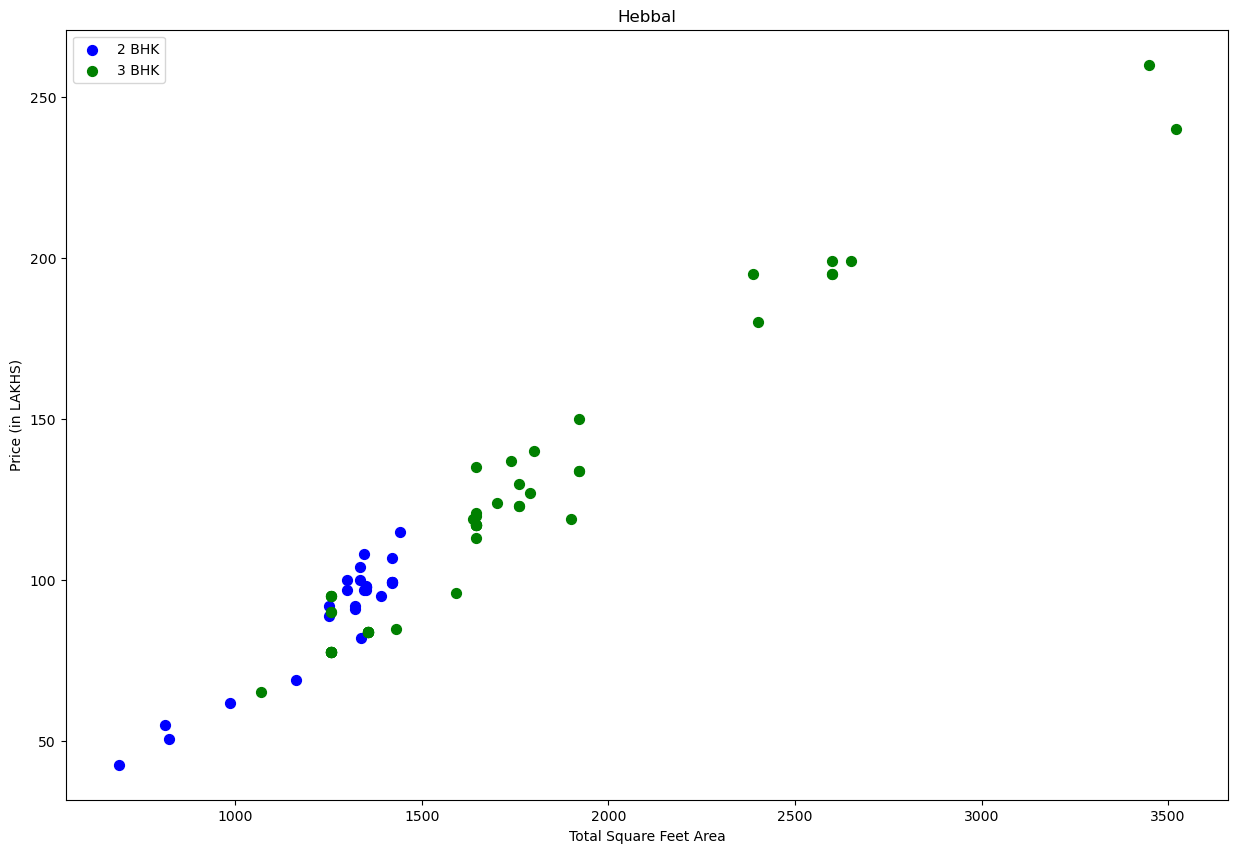

In [49]:
plotScatterChart(dataSetCopy3, 'Hebbal')

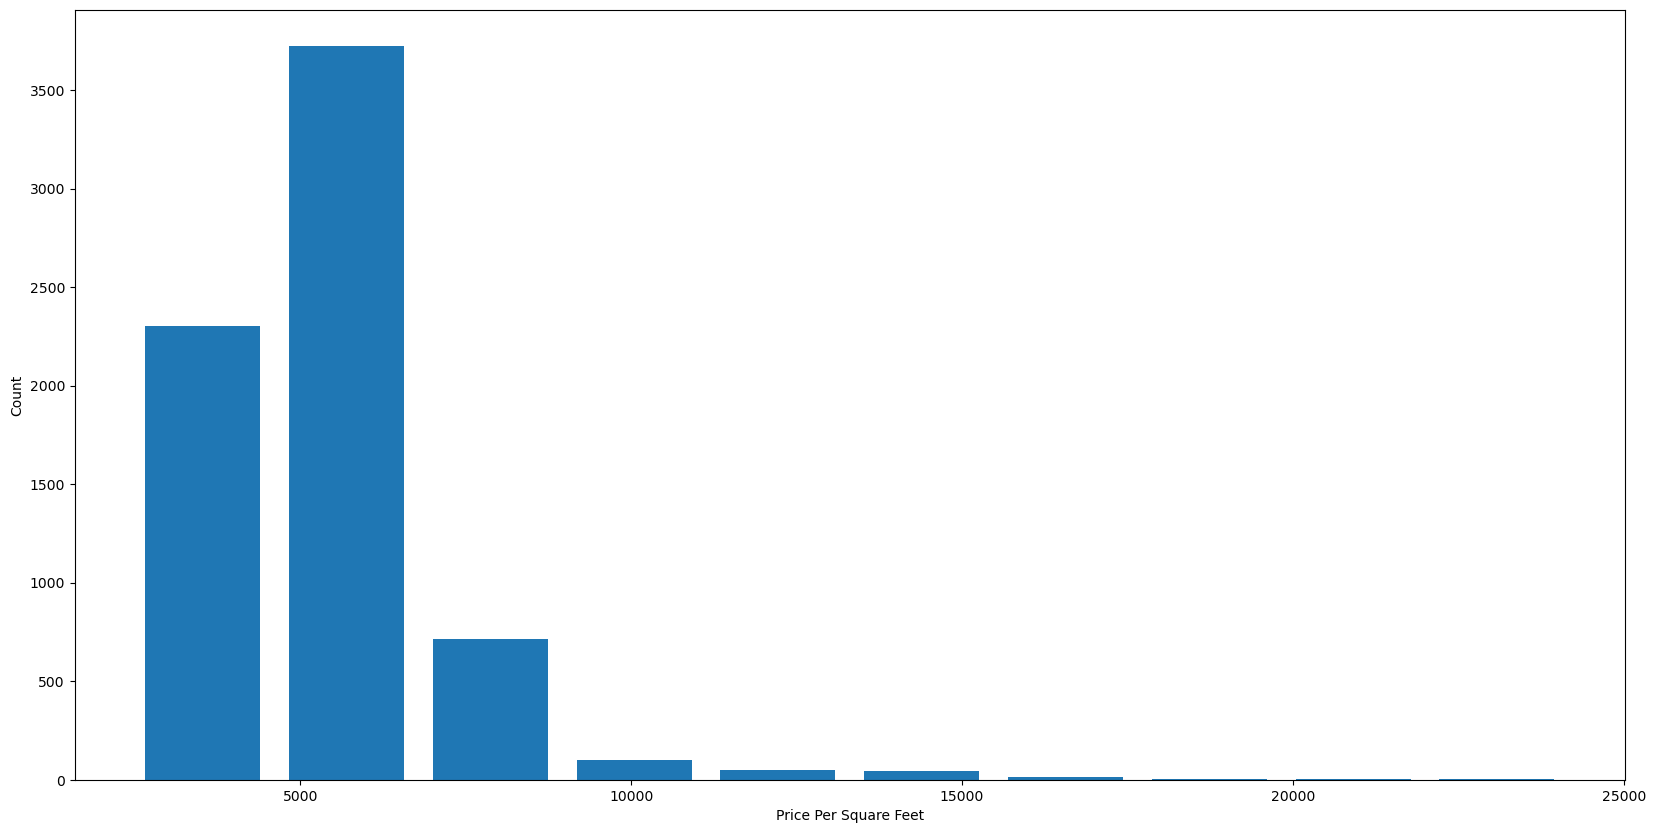

In [50]:
# Lets check how many plots are there in range of price_per_sqft

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(dataSetCopy3.price_per_sqft, rwidth=0.8 )
plt.xlabel('Price Per Square Feet')
plt.ylabel("Count")

plt.show()

In [51]:
# Now remove the outliers based on 'Bathroom'

# check the unique vlaues for bathrooms
dataSetCopy3.bath.unique()

array([ 3.,  2.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [52]:
# Get the records of having bathroom > 10

dataSetCopy3[dataSetCopy3.bath > 10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
3476,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5642,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
5698,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6505,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


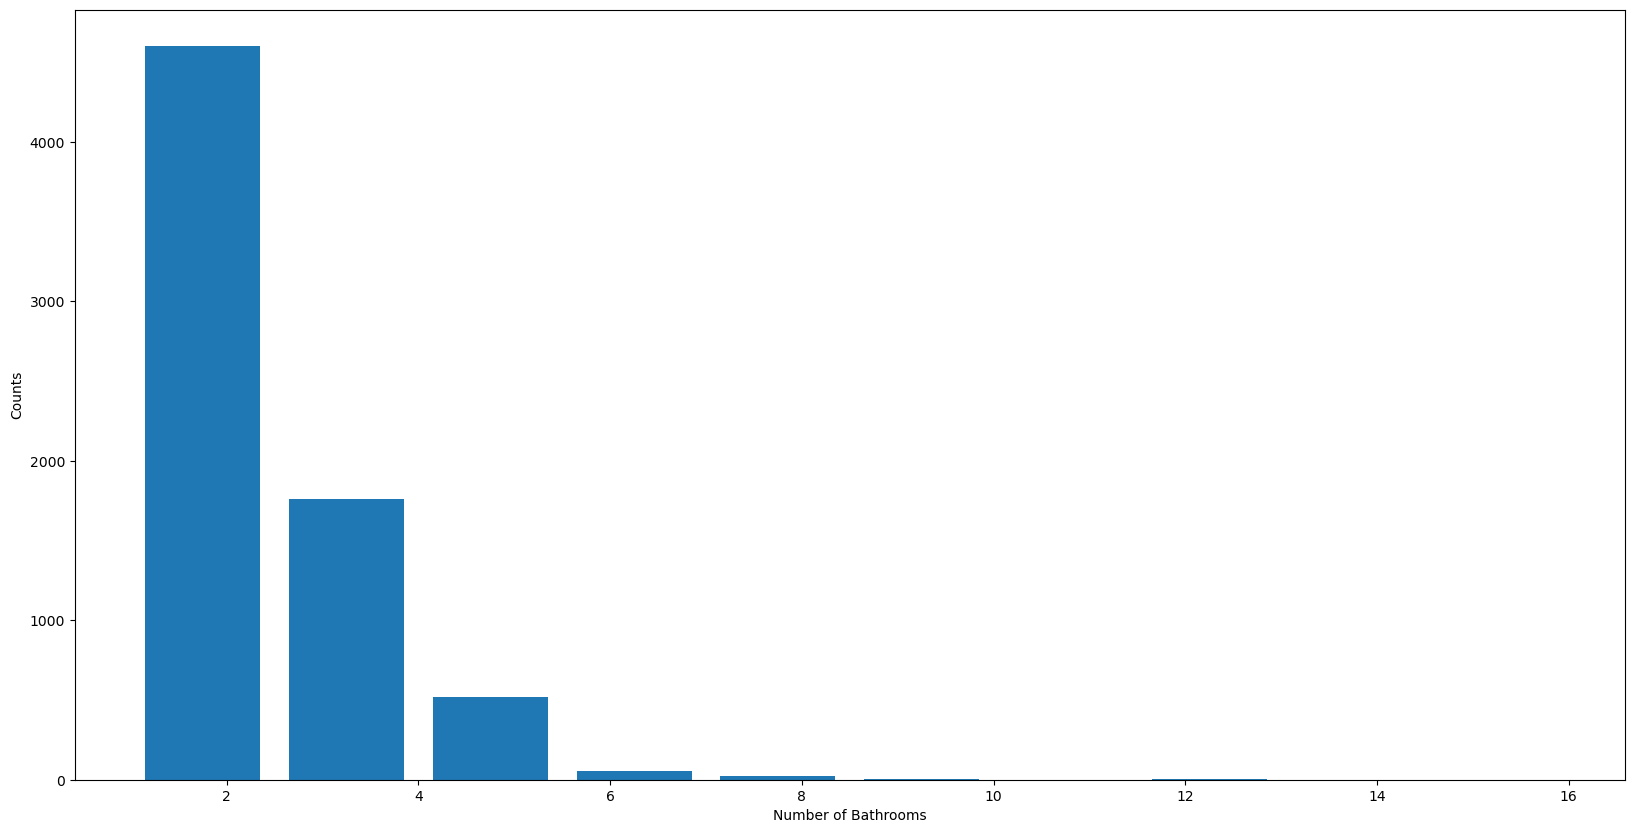

In [53]:
# Lets check how the count is spread based on BATH

plt.hist(dataSetCopy3.bath, rwidth=0.8)

plt.xlabel("Number of Bathrooms")
plt.ylabel("Counts")

plt.show()

In [54]:
# Lets assume that your manager has told a criteria to remove outliers, which goes like this :
# If a house conatins bathrooms more than BHK+2, then its a outlier

In [55]:
# Finding the outliers based on the criteria

dataSetCopy3[dataSetCopy3.bath > (dataSetCopy3.BHK + 2)]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1118,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03252
4411,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03433


In [56]:
# Remove the above outliers

dataSetCopy4 = dataSetCopy3[dataSetCopy3.bath <= (dataSetCopy3.BHK + 2)]

dataSetCopy4.shape

(6963, 7)

In [57]:
# Drop 'size' and 'price_per_sqft' as they have the same values either directly or indirectly in the other columns
dataSetCopy4.drop(['size', 'price_per_sqft'], inplace=True, axis='columns')

dataSetCopy4.head()

C:\Users\prajw\AppData\Local\Temp\ipykernel_2660\2333590272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSetCopy4.drop(['size', 'price_per_sqft'], inplace=True, axis='columns')


,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,1630.0,3.0,194.0,3
1,1st Block Jayanagar,1875.0,2.0,235.0,3
2,1st Block Jayanagar,1235.0,2.0,148.0,2
3,1st Phase JP Nagar,2825.0,4.0,250.0,4
4,1st Phase JP Nagar,1875.0,3.0,167.0,3


### Handling Categorical values [part of preprocessing]

In [58]:
# Lets use Pandas dummies to get rid of the categorical values.

dummies = pd.get_dummies(dataSetCopy4.location, dtype=int)
dummies.head(10)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# we conact the dummies to original dataset and drop any one column to avoid DUMMY TRAP
dataSetCopy5 = pd.concat([dataSetCopy4, dummies.drop('other', axis='columns')],axis='columns')

dataSetCopy5.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2825.0,4.0,250.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Now drop the original 'location' column from the dataset
dataSetCopy5.drop('location', axis='columns', inplace=True)

dataSetCopy5.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2825.0,4.0,250.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 6 : Model Selection and Training

### Choosing the features and labels for the model

In [61]:
# X -> Features; y -> Label

X = dataSetCopy5.drop(['price'], axis='columns')

X.head(5)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2825.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X.shape

(6963, 244)

In [63]:
y = dataSetCopy5.price
y.head(3)

0    194.0
1    235.0
2    148.0
Name: price, dtype: float64

In [64]:
len(y)

6963

In [65]:
# Split the data into Train and Test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [66]:
# We are choosing the Linear Regression model. Beacuse:
# 1. We are dealing with continous values.
# 2. Data shows linear realtionships

In [67]:
from sklearn.linear_model import LinearRegression

# create an object for the Linear regression model
my_model = LinearRegression()

# Train the model using X_train and y_train
my_model.fit(X_train, y_train)

# Calculate the score of the model using TEST dataset
my_model.score(X_test, y_test)

0.9536756411073017

## Step 7 :  Evaluate Model Performance

#### Measuring the accuracy of the model using K-Fold Cross Validation

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Splitting the data into 5 folds of each test set having 20% data of the entire dataset
# Remaining will be used as train set in each iterations
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Calculate the cross_val_score
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89735263, 0.9451021 , 0.91268656, 0.92025677, 0.90125292])

#### Using GridSearchCV for comparing the different models and finding the best models and their respective parameters

In [69]:
# We can see that in each iteration of the Linear regression model, we'vs got around 90%+ which shows how good the model is.

# Just want to compare this Linear Regression model with Decision Tree Regression and Lasso Regression model
# And find which is better and what are the best parameters for the model

In [70]:
# We use GridSearchCV for this purpose

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Defining the function which performs GridSearchCV and returns the best model with their best parameters

# We pass a dictionary which contains the info of different algorithms which we want to compare in the form :
    
#     {
#         'algo_name' : {
#             'model' : Model(),
#             'params' : {
#                 'param1' : [val1, val2],
#                 'param2' : [val1, val2],
#                 ....
#                 ....
#                 ....
#             }
#         }
#     }

def findBestModel(X, y) : 
    
    algos = {
        # Linear Regression
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'positive' : [True, False]
            }
        },
        
        # Lasso Regression
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        
        # Decision Tree Regression
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ["squared_error", "friedman_mse"],
                'splitter' : ["best", "random"]
            }
        }
    }
    
    # to store the scores of the models
    scores = []
    
    # Splitting the data into 5 folds of each test set having 20% data of the entire dataset
    # Remaining will be used as train set in each iterations
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items() : 
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best score' : gs.best_score_,
            'best params' : gs.best_params_
        })

    return pd.DataFrame(scores)
    

In [71]:
# Lest call the above function by passing the entire the Features(X) and Labels(y)
findBestModel(X, y)

,model,best score,best params
0,linear_regression,0.915330,{'positive': False}
1,lasso,0.677768,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.853154,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [72]:
# If we see the above dataframe,
#it is evident that the Linear regression is best among the different models whia=ch were compared


#### Tet the model with some propoerties

In [73]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [74]:
# Function to predict the price

def predictPrice(location, sqft, bath, bhk) : 
    
    # Since we have so many columns for each of the location, cus of one-hot encoding
    # we gonna get the location index of the particular location which is being passed
    locIndex = np.where(X.columns == location)[0][0]
    
    # we are preparing a feature record to pass it to the model
    # in the same order as the original feature X
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    # Marking the location's column with 1 to make understand the model about the location
    if locIndex >= 0 :
        x[locIndex] = 1
    
    # rturning the predicting price
    return my_model.predict([x])[0]

In [75]:
predictPrice('1st Phase JP Nagar',1000, 2, 2)

C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.5064052878572

In [76]:
predictPrice('Indira Nagar',1000, 2, 2)

C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


143.48082405151325

### Export the tested model to a pickle file

In [77]:
import pickle

with open('./models/Bengaluru_Home_Price_Predictions.pickle', 'wb') as f:
    pickle.dump(my_model,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [78]:
import json

# Creating json structure for storing the columns data
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

# Dumping the json structure into the json file
with open('./models/columns.json', 'w') as f:
    f.write(json.dumps(columns))